<a href="https://colab.research.google.com/github/HUSILEBAI/MAGIC_Committed_Glacier_Change/blob/main/Committed_glacier_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

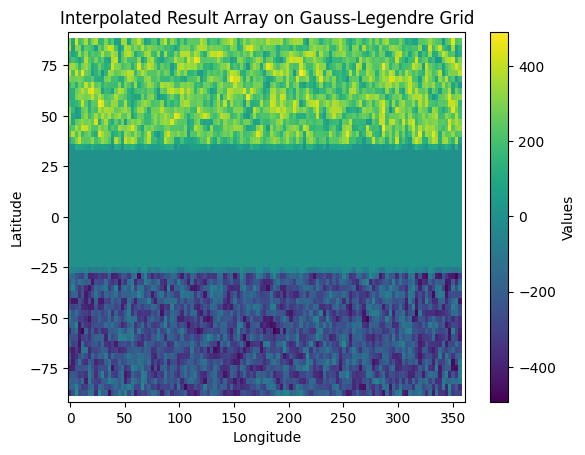

In [15]:
# Set max degree
maxdeg = 60

# Set up Gauss-Legendre grid
N = maxdeg
x, w = np.polynomial.legendre.leggauss(N)
glacier_x = np.arccos(x) * 180 / np.pi - 90
glacier_y = np.linspace(0, 360, 2 * N + 1)[:-1]
glacier_lon, glacier_lat = np.meshgrid(glacier_y, glacier_x)

# Create pairs of coordinates for interpolation
xi = np.column_stack((glacier_lon.ravel(), glacier_lat.ravel()))

# Calculate the number of rows for each category
num_positive_rows = int(0.3 * maxdeg)
num_zero_rows = int(0.35 * maxdeg)
num_negative_rows = maxdeg - num_positive_rows - num_zero_rows

minVal = -500
maxVal = 500

# Generate random numbers for each category
positive_numbers = np.random.uniform(1, maxVal, size=(num_positive_rows, 2 * maxdeg))
zero_numbers = np.zeros((num_zero_rows, 2 * maxdeg))
negative_numbers = np.random.uniform(minVal, -1, size=(num_negative_rows, 2 * maxdeg))

# Concatenate the arrays vertically to form the final 2D array
result_array = np.vstack((positive_numbers, zero_numbers, negative_numbers))

# Shuffle the rows to randomize the order
# np.random.shuffle(result_array)

# Create pairs of coordinates for the result_array
result_x = np.linspace(0, 360, 2 * maxdeg)
result_y = np.linspace(-90, 90, maxdeg)
result_lon, result_lat = np.meshgrid(result_x, result_y)

# Create a 1D grid for interpolation
result_xi = np.column_stack((result_lon.ravel(), result_lat.ravel()))

# Interpolate 'result_array' to the specified grid
interpolated_result_array = griddata(xi, result_array.flatten(), result_xi, method='linear')

# Reshape the interpolated values to match the grid shape
interpolated_result_array = interpolated_result_array.reshape(result_lon.shape)

# Plot the result
# plt.imshow(interpolated_result_array, extent=(0, 360, -90, 90), origin='lower', cmap='viridis')
plt.pcolor(result_lon, result_lat, interpolated_result_array)
plt.title('Interpolated Result Array on Gauss-Legendre Grid')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Values')
plt.show()

In [16]:
# Reshape 'result_array' to a column vector, sort, and flip
reshaped_result_array = np.sort(result_array.reshape(60 * 120, 1))

# Calculate cumulative sum
cumsumA = np.cumsum(reshaped_result_array)

# Find the index where the cumulative sum becomes negative
indA = np.argmax(cumsumA <= 0)

# Calculate the number of negative cells
numnegcells = len(cumsumA) - indA

print(f"The number of cells to cut is {numnegcells}")

The number of cells to cut is 444


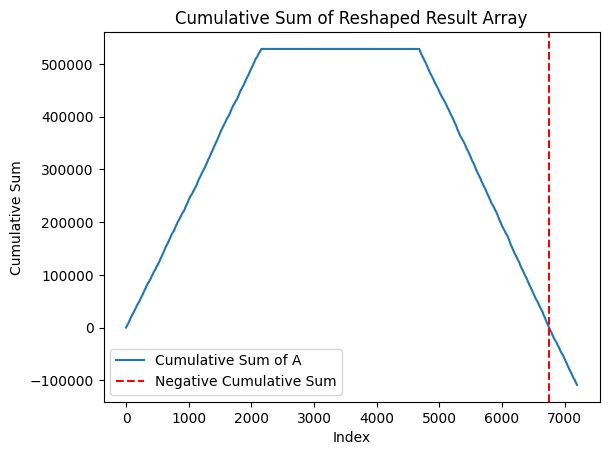

Number of negative cells: 444


In [17]:
# Plot the cumulative sum
plt.plot(cumsumA, label='Cumulative Sum of A')
plt.axvline(x=indA, color='r', linestyle='--', label='Negative Cumulative Sum')
plt.title('Cumulative Sum of Reshaped Result Array')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')
plt.legend()
plt.show()

print("Number of negative cells:", numnegcells)